# Week 3

## Exercises

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy.io import loadmat
import pandas as pd

### Description

An important area of research in machine learning and data mining is the analysis of
text documents. Here, important tasks are to be able to search documents as well as
group related documents together (clustering). In order to accomplish these tasks
the text documents must be converted into a format suitable for data modeling.
We will use the bag of words representation. Here, text documents are stored in a
matrix X where xij indicate how many times word j occurred in document i.
Suppose that we have 5 text documents [2], each containing just a single sentence.
02450 EXERCISE 3 14 February, 2017
* Document 1: The Google matrix P is a model of the internet.
* Document 2: Pij is nonzero if there is a link from webpage i to j.
* Document 3: The Google matrix is used to rank all Web pages.
* Document 4: The ranking is done by solving a matrix eigenvalue problem.
* Document 5: England dropped out of the top 10 in the FIFA ranking.


### The document term matrix
#### 3.1.1
**Propose a suitable bag of words representation for these documents. You
should choose approximately 10 key words in total defining the columns in
the document-term matrix and the words are to be chosen such that each
document at least contains 2 of your key words, i.e. the document-term
matrix should have approximately 10 columns and each row of the matrix
must at least contain 2 non-zero entries**

Words: Google, matrix, nonzero, link, eigenvalue, rank, solution, eigenvalue, FIFA, England

#### 3.1.2
**In practice, the above procedure is carried out automatically, see the script
ex3_1_2.py. You can use a simple class TmgSimple (included in the 02450
Toolbox) to generate a document-term matrix and to convert it into the
format described in the beginning of the exercise (Representation of data
in Python)**

In [37]:
from tmgsimple import TmgSimple

# Generate text matrix with help of simple class TmgSimple
tm = TmgSimple(filename='Data/textDocs.txt', )

# Extract variables representing data
X = tm.get_matrix(sort=True)
attributeNames = tm.get_words(sort=True)

# Display the result
print(attributeNames)
pd.DataFrame(X)


Extracting documents from the file: Data/textDocs.txt

Min. term length: 3
Max. term length: 30
Stemming: False
Stopwords: False

Processing document 1/5...
   Number of terms: 6
Processing document 2/5...
   Number of terms: 6
Processing document 3/5...
   Number of terms: 8
Processing document 4/5...
   Number of terms: 7
Processing document 5/5...
   Number of terms: 8

Number of documents (N):5
Number of extracted terms (M):26

['all', 'done', 'dropped', 'eigenvalue', 'england', 'fifa', 'from', 'google', 'internet', 'link', 'matrix', 'model', 'nonzero', 'out', 'p_ij', 'pages', 'problem', 'rank', 'ranking', 'solving', 'the', 'there', 'top', 'used', 'web', 'webpage']


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0


#### 3.1.3

In [38]:
# Generate text matrix with help of simple class TmgSimple
tm = TmgSimple(filename='Data/textDocs.txt', stopwords_filename='Data/stopWords.txt')

# Extract variables representing data
X = tm.get_matrix(sort=True)
attributeNames = tm.get_words(sort=True)

# Display the result
print(attributeNames)
pd.DataFrame(X)


Extracting documents from the file: Data/textDocs.txt

Min. term length: 3
Max. term length: 30
Stemming: False
Stopwords: True

Processing document 1/5...
   Number of terms: 4
Processing document 2/5...
   Number of terms: 4
Processing document 3/5...
   Number of terms: 5
Processing document 4/5...
   Number of terms: 5
Processing document 5/5...
   Number of terms: 5

Number of documents (N):5
Number of extracted terms (M):19

['dropped', 'eigenvalue', 'england', 'fifa', 'google', 'internet', 'link', 'matrix', 'model', 'nonzero', 'p_ij', 'pages', 'problem', 'rank', 'ranking', 'solving', 'top', 'web', 'webpage']


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


**Inspect the document-term matrix: How does it compare to your original
matrix?**

Words such as the, out, used, from and there have been removed as a part of the removal of the stopwords process. 

#### 3.1.4
Stemming

In [66]:
# Generate text matrix with help of simple class TmgSimple
tm = TmgSimple(filename='Data/textDocs.txt', stopwords_filename='Data/stopWords.txt', stem=True)

# Extract variables representing data
X = tm.get_matrix(sort=True)
attributeNames = tm.get_words(sort=True)

# Display the result
print(attributeNames)
pd.DataFrame(X)




Extracting documents from the file: Data/textDocs.txt

Min. term length: 3
Max. term length: 30
Stemming: True
Stopwords: True

Processing document 1/5...
   Number of terms: 4
Processing document 2/5...
   Number of terms: 4
Processing document 3/5...
   Number of terms: 5
Processing document 4/5...
   Number of terms: 5
Processing document 5/5...
   Number of terms: 5

Number of documents (N):5
Number of extracted terms (M):18

[u'drop', u'eigenvalu', u'england', u'fifa', u'googl', u'internet', u'link', u'matrix', u'model', u'nonzero', u'p_ij', u'page', u'problem', u'rank', u'solv', u'top', u'web', u'webpag']


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


**Inspect the document-term matrix: **
* How does it compare to your original matrix? 

The word ranking has been removed and the occurences of ones in the column have been moved to the rank column since the stem is the same. 

* Can you get to the same result, by using stemmer from nltk package directly?

Yes - stopwords and stemming with the code below:

In [67]:
import nltk
from nltk.stem import *

# Remove English stopwords
stoplist = stopwords.words('english')
stoplist

# Stemming with nltk
porter = nltk.PorterStemmer()
singles = [porter.stem(names) for names in attributeNames]
print "Old values:\n", attributeNames, "\n\nNew values:\n", singles

Old values:
[u'drop', u'eigenvalu', u'england', u'fifa', u'googl', u'internet', u'link', u'matrix', u'model', u'nonzero', u'p_ij', u'page', u'problem', u'rank', u'solv', u'top', u'web', u'webpag'] 

New values:
[u'drop', u'eigenvalu', u'england', u'fifa', u'googl', u'internet', u'link', u'matrix', u'model', u'nonzero', u'p_ij', u'page', u'problem', u'rank', u'solv', u'top', u'web', u'webpag']


#### 3.1.5 - Working with the document matrix

In [70]:
import scipy.linalg as linalg
from similarity import similarity

# Some data deleted as it already existed in the previous script (3.1.4)
# Query vector
q = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

# Method 1 ('for' loop - slow)
N = np.shape(X)[0]; # get the number of data objects
sim = np.zeros((N,1)) # allocate a vector for the similarity
for i in range(N):
    x = X[i,:] # Get the i'th data object (here: document)
    sim[i] = np.dot(q/linalg.norm(q), x.T/linalg.norm(x)) # Compute cosine similarity

# Method 2 (one line of code with no iterations - faster)
sim = np.dot(q, X.T).T / (np.sqrt(np.power(X,2).sum(axis=1)) * np.sqrt(np.power(q,2).sum()))

# Method 3 (use the "similarity" function)
sim = similarity(X, q, 'cos');


# Display the result
print('Query vector:\n {0}\n'.format(q))
print('Similarity results:\n {0}'.format(sim))

Query vector:
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0]

Similarity results:
 [[ 0.28867513]
 [ 0.        ]
 [ 0.51639778]
 [ 0.77459667]
 [ 0.25819889]]


As can be seen from the above vector, the 4th document has a similarity values of $0.774$ which is the highest of all the documents. Document 2 has no similariy at all -- there are no words in common.

### Summary Statistics

In [72]:
x = np.array([-0.68, -2.11, 2.39, 0.26, 1.46, 1.33, 1.03, -0.41, -0.33, 0.47])

# Compute values
mean_x   = x.mean()
std_x    = x.std(ddof=1)
median_x = np.median(x)
range_x  = x.max()-x.min()

# Display results
print 'Vector:',             x 
print 'Mean:',               mean_x
print 'Standard Deviation:', std_x
print 'Median:',             median_x
print 'Range:',              range_x


Vector: [-0.68 -2.11  2.39  0.26  1.46  1.33  1.03 -0.41 -0.33  0.47]
Mean: 0.341
Standard Deviation: 1.29059374794
Median: 0.365
Range: 4.5


### Measure of similarity

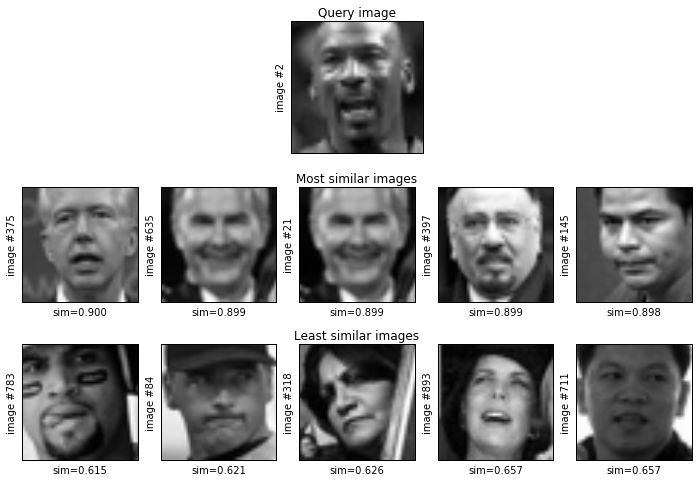

In [79]:
# Image to use as query
i = 2

# Similarity: 'SMC', 'Jaccard', 'ExtendedJaccard', 'Cosine', 'Correlation' 
similarity_measure = 'cosine'

# Load the CBCL face database
# Load Matlab data file to python dict structure
X = loadmat('Data/wildfaces_grayscale.mat')['X']
N, M = X.shape

# Search the face database for similar faces
# Index of all other images than i
noti = list(range(0,i)) + list(range(i+1,N)) 

# Compute similarity between image i and all others
sim = similarity(X[i,:], X[noti,:], similarity_measure)
sim = sim.tolist()[0]

# Tuples of sorted similarities and their indices
sim_to_index = sorted(zip(sim,noti))

# Visualize query image and 5 most/least similar images
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)

img_hw = int(np.sqrt(len(X[0])))
plt.imshow(np.reshape(X[i],(img_hw,img_hw)).T, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Query image')
plt.ylabel('image #{0}'.format(i))

for ms in range(5):

    # 5 most similar images found
    plt.subplot(3,5,6+ms)
    im_id = sim_to_index[-ms-1][1]
    im_sim = sim_to_index[-ms-1][0]
    plt.imshow(np.reshape(X[im_id],(img_hw,img_hw)).T, cmap=plt.cm.gray)
    plt.xlabel('sim={0:.3f}'.format(im_sim))
    plt.ylabel('image #{0}'.format(im_id))
    plt.xticks([]); plt.yticks([])
    if ms==2: plt.title('Most similar images')

    # 5 least similar images found
    plt.subplot(3,5,11+ms)
    im_id = sim_to_index[ms][1]
    im_sim = sim_to_index[ms][0]
    plt.imshow(np.reshape(X[im_id],(img_hw,img_hw)).T, cmap=plt.cm.gray)
    plt.xlabel('sim={0:.3f}'.format(im_sim))
    plt.ylabel('image #{0}'.format(im_id))
    plt.xticks([]); plt.yticks([])
    if ms==2: plt.title('Least similar images')
    
plt.show()

#### Similarity

In [82]:
# Generate two data objects with M random attributes
M = 5;
x = np.mat(np.random.rand(1,M))
y = np.mat(np.random.rand(1,M))

# Two constants
a = 1.5
b = 1.5

# Check the statements in the exercise
print("Cosine scaling: %.4f              " % (similarity(x,y,'cos') - similarity(a*x,y,'cos'))[0,0])
print("ExtendedJaccard scaling: %.4f     " % (similarity(x,y,'ext') - similarity(a*x,y,'ext'))[0,0])
print("Correlation scaling: %.4f         " % (similarity(x,y,'cor') - similarity(a*x,y,'cor'))[0,0])
print("Cosine translation: %.4f          " % (similarity(x,y,'cos') - similarity(b+x,y,'cos'))[0,0])
print("ExtendedJaccard translation: %.4f " % (similarity(x,y,'ext') - similarity(b+x,y,'ext'))[0,0])
print("Correlation translation: %.4f     " % (similarity(x,y,'cor') - similarity(b+x,y,'cor'))[0,0])


Cosine scaling: -0.0000              
ExtendedJaccard scaling: 0.0069     
Correlation scaling: -0.0000         
Cosine translation: -0.0555          
ExtendedJaccard translation: 0.2561 
Correlation translation: 0.0000     
